In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import librosa
import soundfile as sf

# Path to the GTZAN dataset folder (replace with your actual path)
song = '/content/drive/MyDrive/gtzan_dataset/Data/genres_original/blues/blues.00000.wav'
audio, sr = librosa.load(song, sr=None)
hop_length = 1024

mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=8, hop_length=hop_length)
mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=32, n_fft=2048, hop_length=hop_length)
mel_db = librosa.power_to_db(mel, ref=np.max)
chroma = librosa.feature.chroma_stft(y=audio, sr=sr, hop_length=hop_length)
tonnetz = librosa.feature.tonnetz(y=audio, sr=sr, hop_length=hop_length)

Mounted at /content/drive


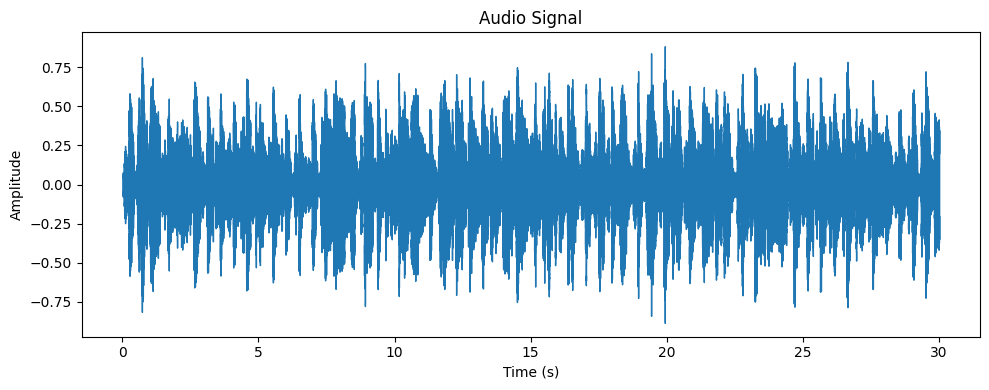

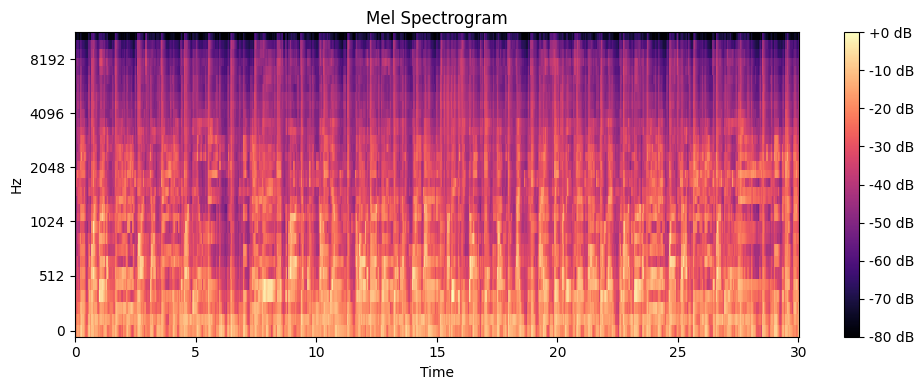

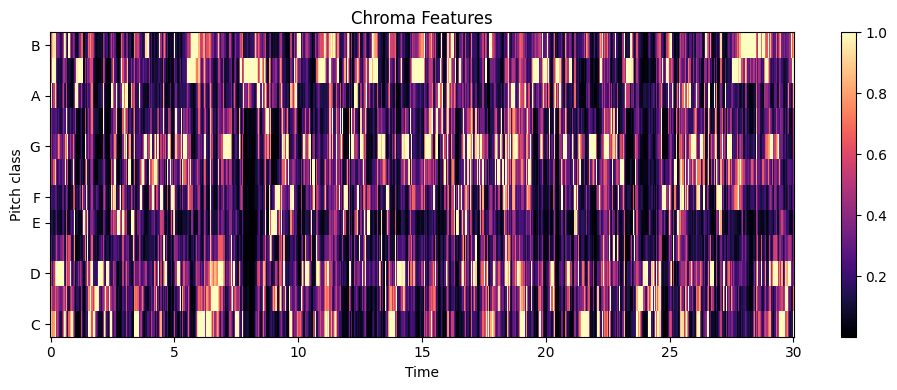

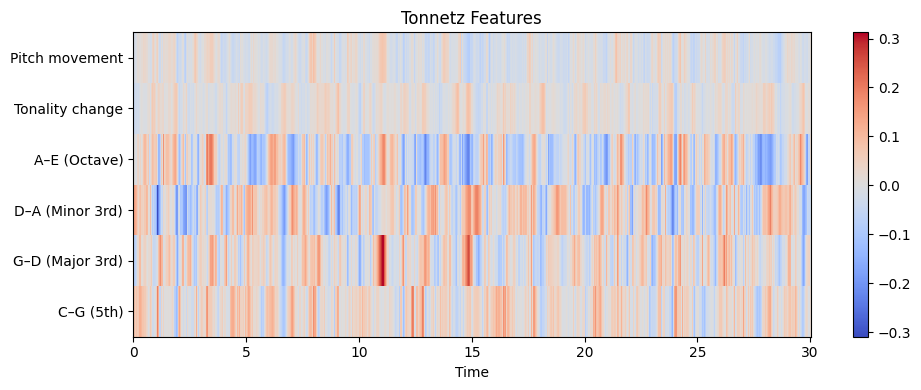

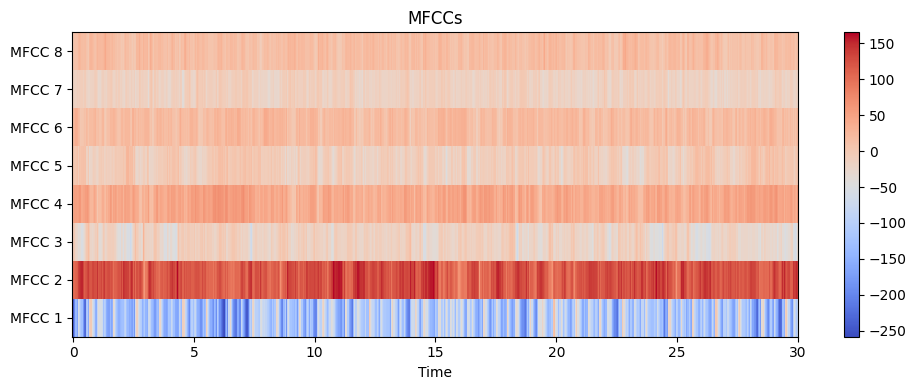

In [15]:
# prompt: make 5  different plots. Of the original audio signal mel spectrogram (mel_db), chroma, tonnetz, mfcc . refine the figures to look very polished. save them in a folder called 'features' in /content/drive/MyDrive/Colab Notebooks/genriflow/ . I also want to see them . also label the tonnetz features  including the 2 on the top which normally have no label

from google.colab import drive
import os
import numpy as np
from sklearn.model_selection import train_test_split
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

drive.mount('/content/drive', force_remount=True)

# Path to the GTZAN dataset folder (replace with your actual path)
song = '/content/drive/MyDrive/gtzan_dataset/Data/genres_original/blues/blues.00000.wav'
audio, sr = librosa.load(song, sr=None)
hop_length = 1024

mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=8, hop_length=hop_length)
mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=32, n_fft=2048, hop_length=hop_length)
mel_db = librosa.power_to_db(mel, ref=np.max)
chroma = librosa.feature.chroma_stft(y=audio, sr=sr, hop_length=hop_length)
tonnetz = librosa.feature.tonnetz(y=audio, sr=sr, hop_length=hop_length)

# Create the 'features' directory if it doesn't exist
output_dir = '/content/drive/MyDrive/Colab Notebooks/genriflow/features'
os.makedirs(output_dir, exist_ok=True)


# Plot the original audio signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'audio_signal.png'))
plt.show()


# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'mel_spectrogram.png'))
plt.show()

# Plot the Chroma features
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, sr=sr, hop_length=hop_length, x_axis='time', y_axis='chroma')
plt.title('Chroma Features')
plt.colorbar()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'chroma_features.png'))
plt.show()

# Plot the Tonnetz features
plt.figure(figsize=(10, 4))
librosa.display.specshow(tonnetz, sr=sr, hop_length=hop_length, x_axis='time')
plt.title('Tonnetz Features')
plt.colorbar()
plt.yticks([0, 1, 2, 3, 4, 5], ['C–G (5th)', 'G–D (Major 3rd)', 'D–A (Minor 3rd)', 'A–E (Octave)', 'Tonality change', 'Pitch movement'])
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'tonnetz_features.png'))
plt.show()


# Plot the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length, x_axis='time')
plt.yticks(
    ticks=np.arange(mfcc.shape[0]),
    labels=[f'MFCC {i+1}' for i in range(mfcc.shape[0])]
)
plt.title('MFCCs')
plt.colorbar()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'mfccs.png'))
plt.show()
